In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn


from sklearn.model_selection import train_test_split


from sklearn.neighbors import KNeighborsClassifier


from sklearn import preprocessing
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# df = pd.read_csv(
#     'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/'
#     'IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/'
#     'data/teleCust1000t.csv'
# )

# df

df = pd.read_csv(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv'
)

df

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3


In [3]:
df['custcat'].nunique()

4

In [4]:
df['custcat'].unique()

array([1, 4, 3, 2])

In [5]:
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

In [6]:
X = df.drop(['custcat'], axis = 1)

y = df['custcat']


X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)


#Train Model and Predict
k = 4  

KNN_classifier = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)


Pred_y = KNN_classifier.predict(X_test)

print("Accuracy of model at K=4 is",metrics.accuracy_score(y_test, Pred_y))

Accuracy of model at K=4 is 0.32


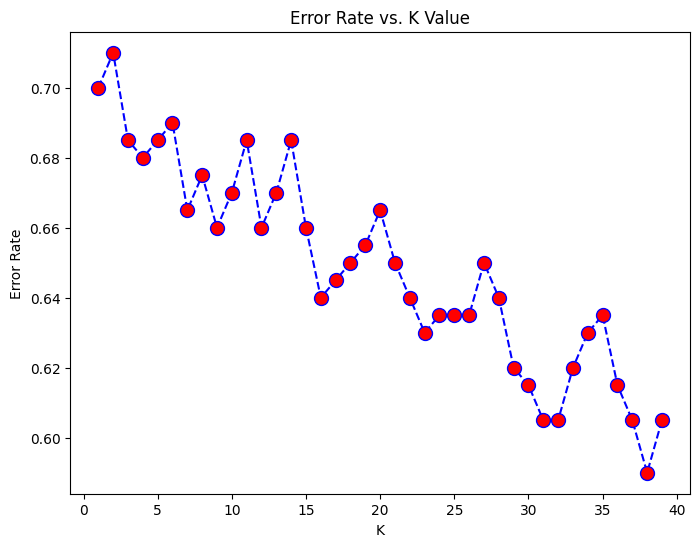

In [7]:
error_rate = []


for i in range(1,40):
    
 knn = KNeighborsClassifier(n_neighbors=i)
    
 knn.fit(X_train,y_train)
    
 pred_i = knn.predict(X_test)
    
 error_rate.append(np.mean(pred_i != y_test))


plt.figure(figsize=(8,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [8]:
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Minimum error:- 0.59 at K = 37


In [9]:
#Train Model and Predict
k = 37
KNN_classifier = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Pred_y = KNN_classifier.predict(X_test)
print("Accuracy of model at K=37 is",metrics.accuracy_score(y_test, Pred_y))

Accuracy of model at K=37 is 0.395
